/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data size: 70000, 784
Labels size: 70000


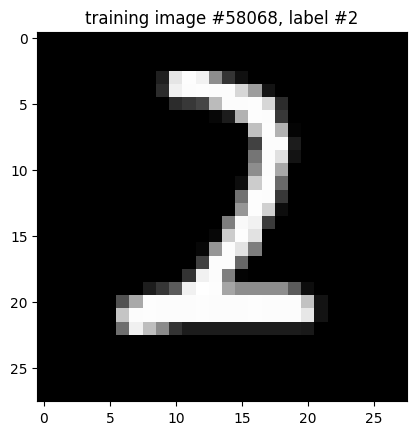

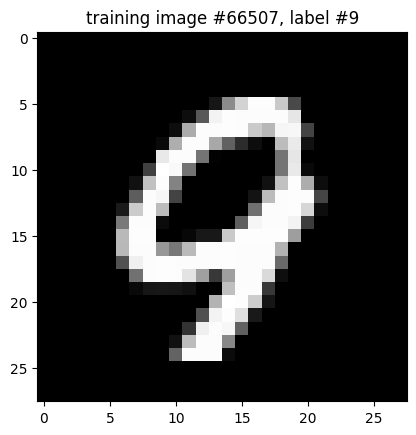

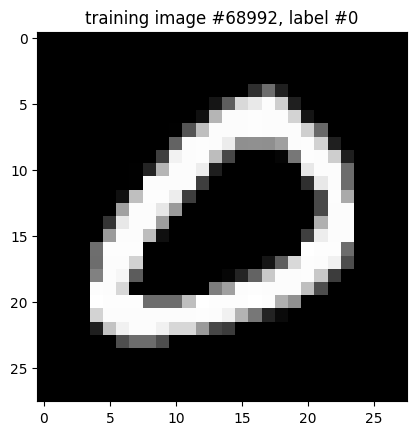

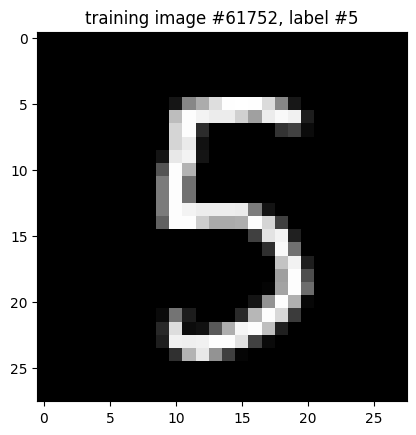

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from sklearn.datasets import fetch_openml
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time

# Load MNIST data from https://www.openml.org/d/554
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Print the size of the data and labels
print('Data size: %d, %d' % (X.shape[0],X.shape[1]))
print('Labels size: %d' % (y.shape))

# Show some random training samples
num_random_samples = 4
random_samples = np.random.randint(0, X.shape[0], num_random_samples)
X_images = X.values.reshape(-1, 28, 28)
for random_sample_i in random_samples:
    imi = X_images[random_sample_i,:,:]
    fig, ax1 = plt.subplots(1,1)
    figtitle = "training image #%d, label #%s" % (random_sample_i, y[random_sample_i])
    ax1.imshow(imi, cmap=plt.get_cmap('gray'))
    ax1.set_title(figtitle)
    plt.show()

In [ ]:
# Split into train and test
train_samples = 60000 # max training size is 60000. Super-slow with this max value though, try it out with smaller numbers...
test_samples = 10000 # max test size is 10000. Super-slow with this max value though, try it out with smaller numbers...
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=train_samples, test_size = test_samples, random_state=42)
# Note that train_test_split already shuffles the data, otherwise you should shuffle!

# For several values of the k parameter
for k in range(1, 18, 2):

    # Start timer to report the time
    start_time = time.time()

    # Define a knn classifier with the training data
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Evaluate the model with the test split and print results
    score = clf.score(X_val, y_val)
    print("k=%d, accuracy=%.2f%%, time=%.1f s" % (k, score * 100, time.time() - start_time))

k=1, accuracy=97.22%, time=42.9 s
k=3, accuracy=97.11%, time=40.5 s
k=5, accuracy=96.96%, time=40.8 s
k=7, accuracy=96.87%, time=41.6 s
k=9, accuracy=96.69%, time=41.0 s
k=11, accuracy=96.50%, time=41.0 s
k=13, accuracy=96.48%, time=42.0 s
k=15, accuracy=96.48%, time=43.2 s
k=17, accuracy=96.39%, time=41.4 s


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       983
           1       0.97      0.99      0.98      1152
           2       0.98      0.97      0.98       967
           3       0.97      0.97      0.97      1034
           4       0.96      0.96      0.96       906
           5       0.97      0.98      0.97       937
           6       0.99      0.98      0.98       961
           7       0.96      0.98      0.97      1055
           8       0.98      0.94      0.96       969
           9       0.95      0.96      0.96      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



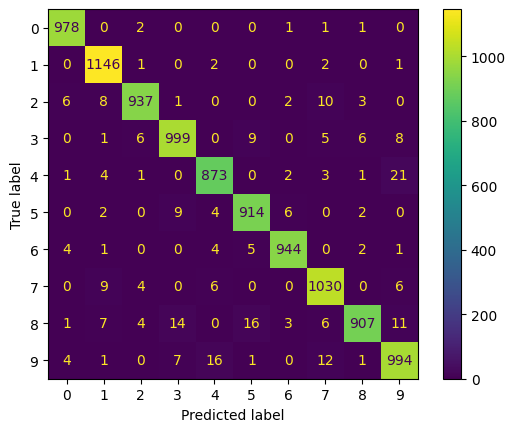

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_val) # Predict the labels for the test data
print(classification_report(y_val, y_val_pred)) # Print the classification report
cm = confusion_matrix(y_val, y_val_pred) # Compute the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Create a ConfusionMatrixDisplay object
disp.plot() # Plot the confusion matrix
plt.show() # Show the plot

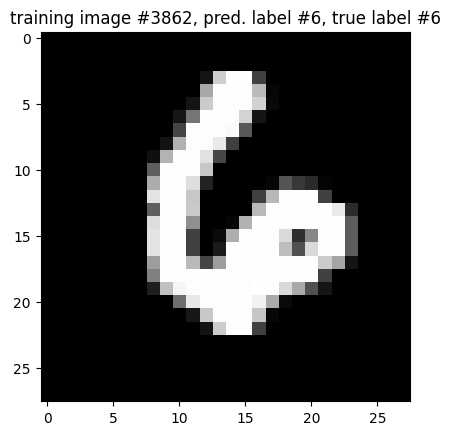

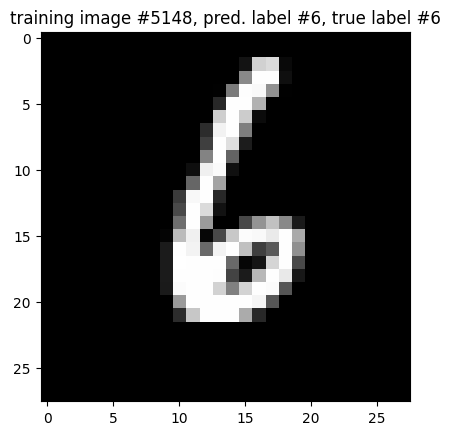

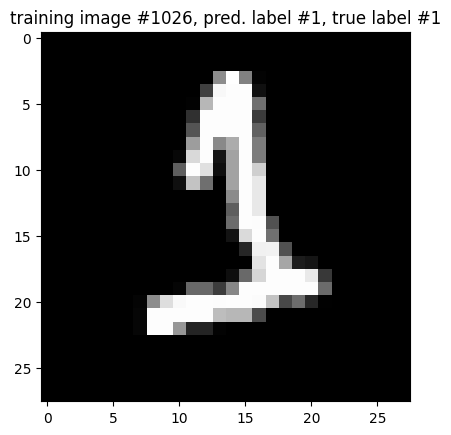

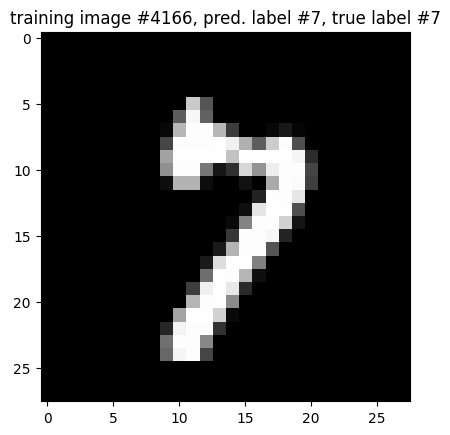

In [ ]:
# Show some random predictions
num_random_samples = 4
random_samples = np.random.randint(0, X_val.shape[0], num_random_samples)
X_val_images = X_val.values.reshape(-1, 28, 28)
for random_sample_i in random_samples:
    imi = X_val_images[random_sample_i,:,:]
    fig, ax1 = plt.subplots(1,1)
    figtitle = "training image #%d, pred. label #%s, true label #%s" % (random_sample_i, y_val_pred[random_sample_i], y_val.iloc[random_sample_i])
    ax1.imshow(imi, cmap=plt.get_cmap('gray'))
    ax1.set_title(figtitle)
    plt.show()

In [ ]:
def plot_misclassified_images(X, y_true, y_pred, misclassified_idx, num_images=10):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(misclassified_idx[:num_images]):
        fig, ax1 = plt.subplots(1,1)
        imi = X[idx,:,:]
        figtitle = "training image #%d, pred. label #%s, true label #%s" % (idx, y_pred[idx], y_true.iloc[idx])
        ax1.imshow(imi, cmap=plt.get_cmap('gray'))
        ax1.set_title(figtitle)
        plt.show()

<Figure size 1000x1000 with 0 Axes>

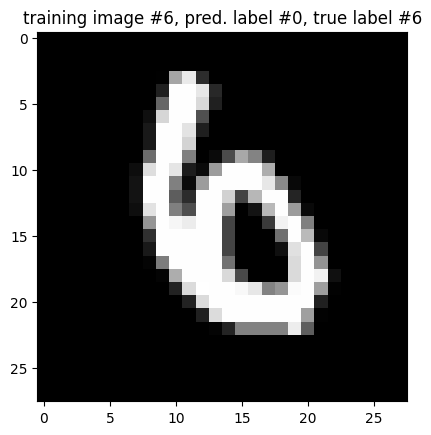

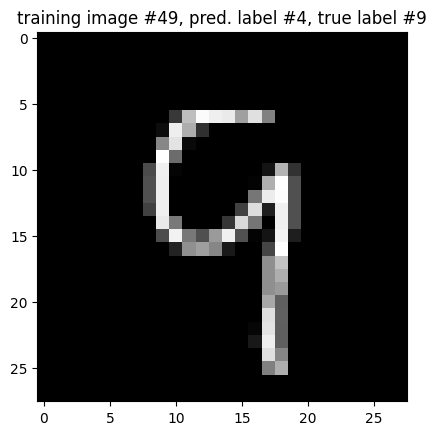

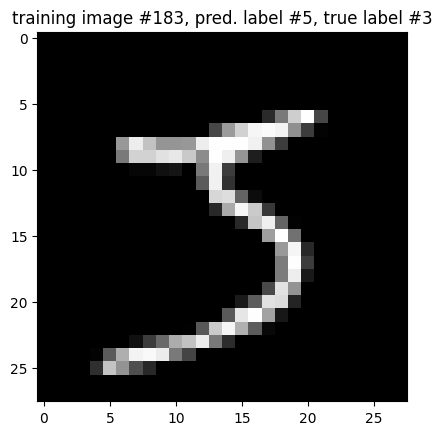

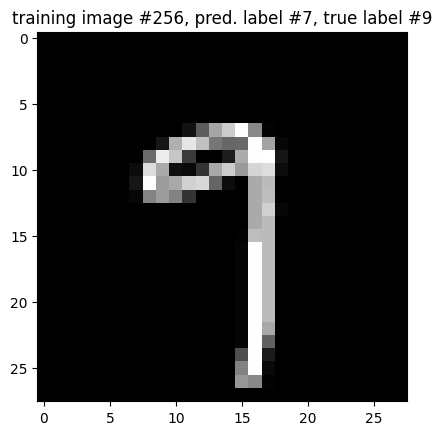

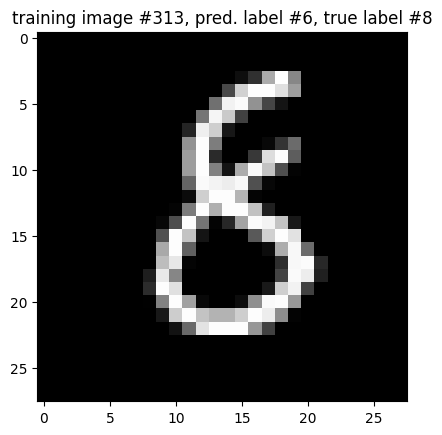

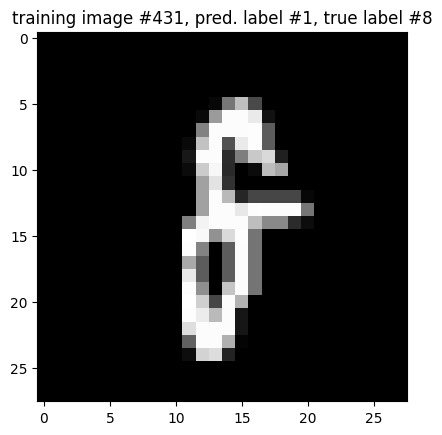

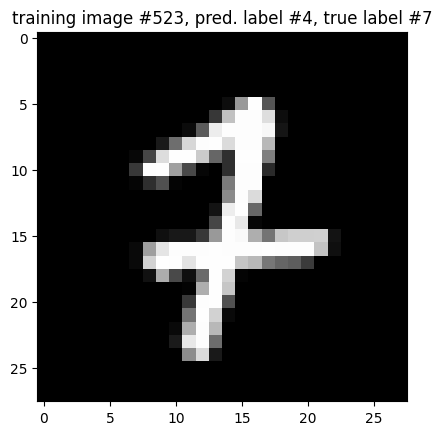

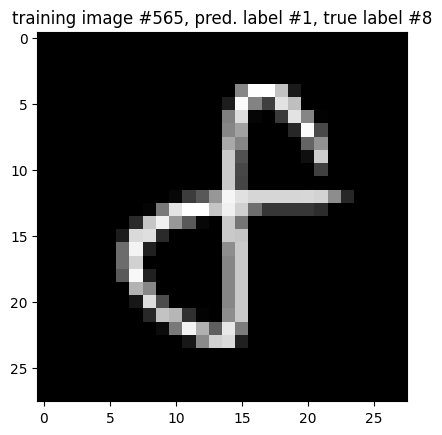

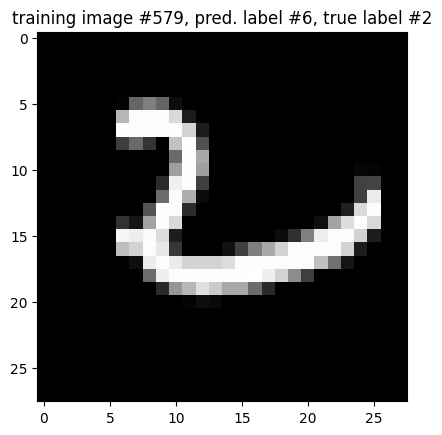

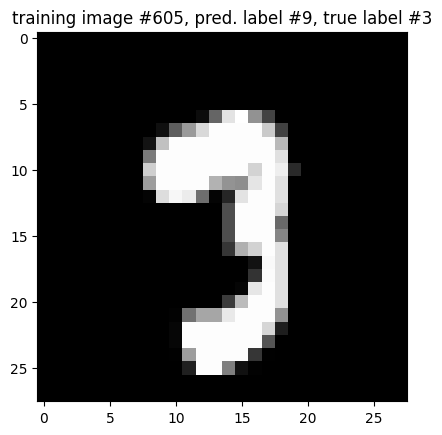

In [ ]:
# Plot some missclasified images
misclassified_idx = np.where(y_val_pred != y_val)[0]
X_val_images = X_val.values.reshape(-1, 28, 28)
plot_misclassified_images(X_val_images, y_val, y_val_pred, misclassified_idx)